In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Initial CSV Read

xGS_Total = pd.read_csv(r'CSVs\International\Int_xGS_Total.csv' ,encoding='latin-1')
xGA_Total = pd.read_csv(r'CSVs\International\Int_xGA_Total.csv' ,encoding='latin-1')
# loading linear algorithms
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

# tree based algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Get corrs between Gls and features
xGS_corrs = abs(xGS_Total.corr())['Gls'].sort_values(ascending=False)
xGA_corrs = abs(xGA_Total.corr())['O. Gls'].sort_values(ascending=False)

In [3]:
# It looks like G/Sh is the highest correlated feature with Gls.
xGS_corrs

Gls        1.000000
G/Sh       0.812597
SoT        0.779099
G/SoT      0.687219
Sh         0.599977
Poss       0.576907
SoT%       0.506920
PKatt      0.310739
MP         0.285975
O. CrdY    0.267001
CrdY       0.264677
Int        0.217464
Year       0.166428
CrdR       0.133139
Fld        0.121539
TklW       0.062697
O. TklW    0.062034
Age        0.048508
Name: Gls, dtype: float64

In [4]:
xGA_corrs

O. Gls      1.000000
O. SoT      0.819783
O. G/Sh     0.775568
O. Sh       0.679150
O. G/SoT    0.575009
O. SoT%     0.542885
O. Poss     0.538468
CrdY        0.406690
O. PKatt    0.330771
O. CrdY     0.278928
O. Int      0.178376
O. CrdR     0.132090
Year        0.099312
TklW        0.084096
O. Fld      0.073035
O. MP       0.052627
O. Age      0.045203
O. TklW     0.016299
Name: O. Gls, dtype: float64

In [5]:
xGS_Total.columns

Index(['Key', 'Year', 'Competition', 'Squad', 'Age', 'Poss', 'Gls', 'Sh',
       'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'PKatt', 'CrdY', 'CrdR', 'Fld', 'Int',
       'TklW', 'Confederation', 'O. CrdY', 'O. TklW', 'MP'],
      dtype='object')

In [6]:
# first ML model for XGS & xGA, dropping irrelevant features AND FEATURES THAT ARE VERY SIMILAR 
xGS_Column_Drop_List = ['Key','Year','Competition','Squad','Age','Sh','MP','G/SoT','CrdY','CrdR','Fld','TklW','O. TklW','G/Sh']
xGA_Column_Drop_List = ['Key','Year','Competition','Squad','O. Age','O. Sh','O. MP','O. G/SoT','O. CrdR','O. Fld', 'O. TklW', 'TklW','O. G/Sh']

xGS_Model_1 = xGS_Total.drop(xGS_Column_Drop_List, axis=1)
xGA_Model_1 = xGA_Total.drop(xGA_Column_Drop_List, axis=1)

In [7]:
# Scaling Remaining Features - removing Gls and Confederation when scaling, and adding back in

xGS_Model_1_features = xGS_Model_1.drop(['Confederation','Gls'], axis=1)
xGA_Model_1_features = xGA_Model_1.drop(['Confederation','O. Gls'], axis=1)

xGS_scaler = StandardScaler().fit(xGS_Model_1_features)
xGA_scaler = StandardScaler().fit(xGA_Model_1_features)


xGS_scaler_df = pd.DataFrame(xGS_scaler.transform(xGS_Model_1_features), columns = xGS_Model_1_features.columns)
xGA_scaler_df = pd.DataFrame(xGA_scaler.transform(xGA_Model_1_features), columns = xGA_Model_1_features.columns)

xGS_scaler_df['Gls'] = xGS_Model_1['Gls']
xGA_scaler_df['O. Gls'] = xGA_Model_1['O. Gls']
xGS_scaler_df['Confederation'] = xGS_Model_1['Confederation']
xGA_scaler_df['Confederation'] = xGA_Model_1['Confederation']

In [8]:
# Create final model variable and one-hot encode Confederation

xGS_Model_1_Final = pd.get_dummies(xGS_scaler_df, columns=['Confederation'])
xGA_Model_1_Final = pd.get_dummies(xGA_scaler_df, columns=['Confederation'])

In [9]:
xGS_Model_1_Final

,Poss,SoT,SoT%,PKatt,Int,O. CrdY,Gls,Confederation_AFC,Confederation_CAF,Confederation_CONCACAF,Confederation_CONMEBOL,Confederation_UEFA
0,1.695714,1.294321,0.212768,-0.869516,-0.406142,-0.651408,1.13,1,0,0,0,0
1,0.221953,-0.986076,-1.535799,3.084664,-1.023430,-0.120264,0.67,1,0,0,0,0
2,-0.334572,0.218906,-0.858060,0.487889,-0.341344,-0.530004,0.70,1,0,0,0,0
3,0.108587,-0.422455,0.009446,0.310836,-0.204926,-0.530004,1.20,1,0,0,0,0
4,-1.323950,-0.552023,0.009446,1.078065,0.681786,-0.636233,1.33,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381,0.294095,-0.027273,0.660076,0.723960,-1.275802,0.835795,1.42,0,0,0,0,1
382,-2.540060,-1.912488,-1.291813,-0.869516,0.136117,-1.288781,0.10,0,0,0,0,1
383,-2.838935,-1.782920,1.703794,-0.869516,-0.955221,-1.440537,0.10,0,0,0,0,1
384,0.015833,-0.098535,0.009446,0.310836,-0.545969,0.684040,1.30,0,0,0,0,1


In [10]:
# Get features and target for both models

xGS_X = xGS_Model_1_Final.drop('Gls', axis=1).values
xGS_y = xGS_Model_1_Final['Gls'].values

xGA_X = xGA_Model_1_Final.drop('O. Gls', axis=1).values
xGA_y = xGA_Model_1_Final['O. Gls']

In [11]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGS_X_train, xGS_X_test, xGS_y_train, xGS_y_test = train_test_split(xGS_X, xGS_y, random_state=42, test_size=.25)

# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGA_X_train, xGA_X_test, xGA_y_train, xGA_y_test = train_test_split(xGA_X, xGA_y, random_state=42, test_size=.25)

In [12]:
# Evaluate Model function

def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, test_preds)
    plt.title("Actual vs Predicted Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot(y_test, y_test)
    plt.show()
    
    # Plot Residuals
    plt.figure(figsize=(10,6))
    plt.scatter(test_preds, test_preds - y_test)
    plt.hlines(y=0, xmin=test_preds.min(), xmax=test_preds.max(), color="r")
    plt.title("Residuals")
    plt.xlabel("Prediction")
    plt.ylabel("Error")
    plt.show()

    return(model)

In [13]:
# xGS Model EXPLORATION:

TRAINING SET
root mean squared error (RMSE): 0.39442647490917304
R-squared (R2 ): 0.6692359057407328
MAE 0.3053590563326864

Testing SET
root mean squared error (RMSE): 0.41255344980709896
R-squared (R2 ): 0.617170480156242
MAE 0.3079631061202021


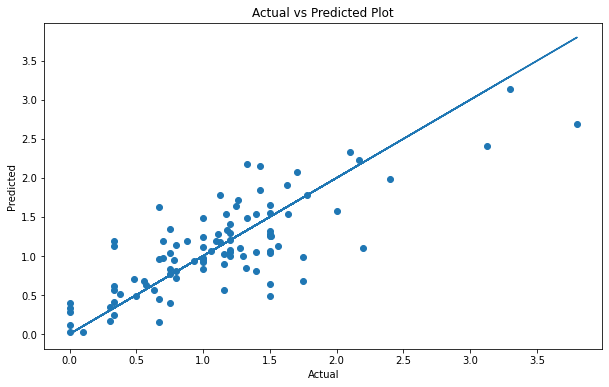

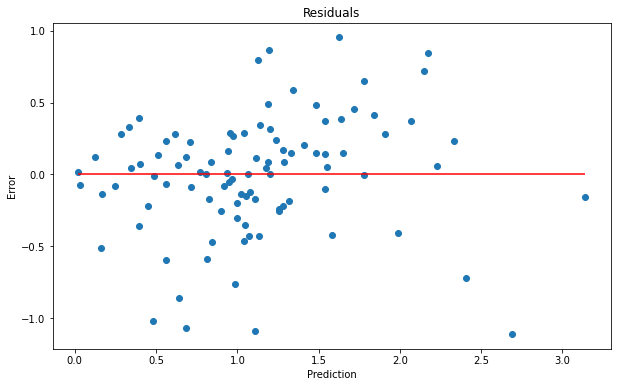

In [14]:
lr = LinearRegression()
lr = evaluateModel(lr, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.3944359990393535
R-squared (R2 ): 0.669219931770793
MAE 0.30536991027515326

Testing SET
root mean squared error (RMSE): 0.4122552743853198
R-squared (R2 ): 0.6177236647299452
MAE 0.30817446505786267


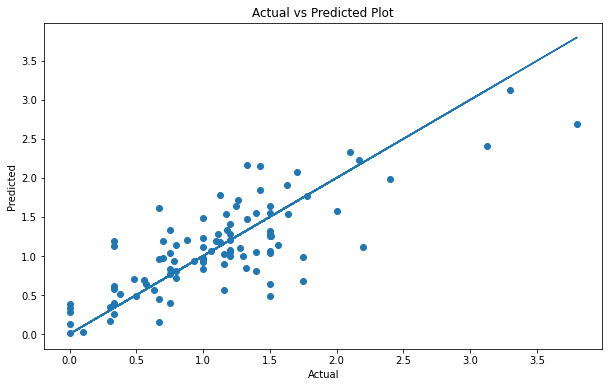

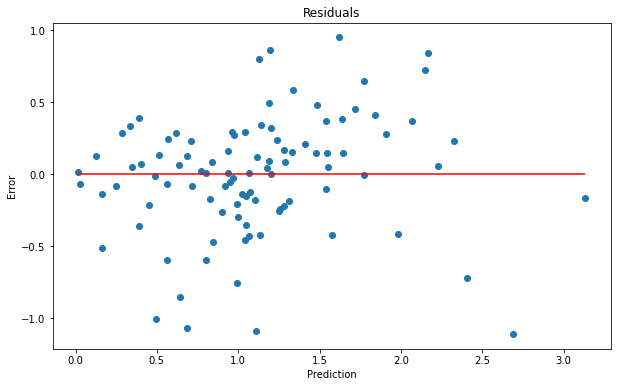

In [15]:
ridge = Ridge()
ridge = evaluateModel(ridge, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [16]:
# Elastic net, DecisionTreeRegressor, 

TRAINING SET
root mean squared error (RMSE): 0.15320552268090984
R-squared (R2 ): 0.9500960313810449
MAE 0.11354948096885807

Testing SET
root mean squared error (RMSE): 0.45330488761320514
R-squared (R2 ): 0.5378044327698026
MAE 0.3513989690721649


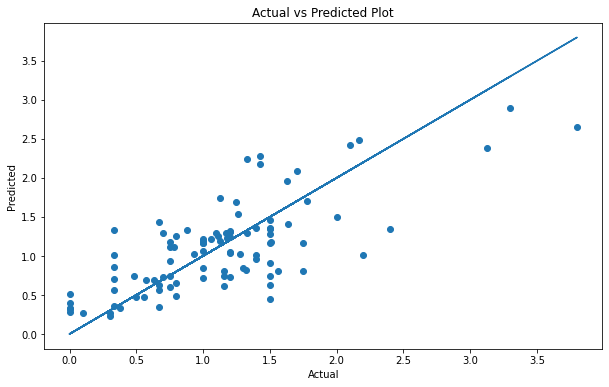

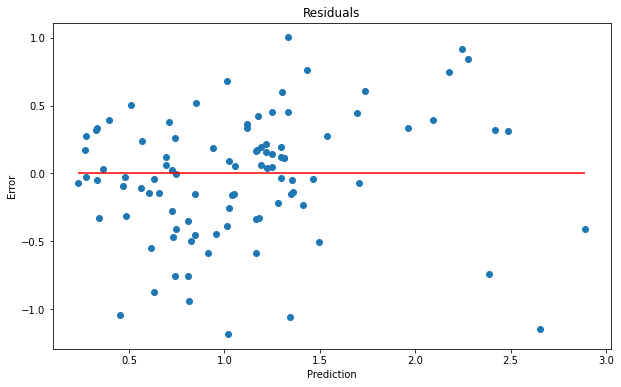

In [17]:
rf = RandomForestRegressor()
rf = evaluateModel(rf, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.31525630587781084
R-squared (R2 ): 0.7886930374872358
MAE 0.2632757306747291

Testing SET
root mean squared error (RMSE): 0.44210807063982355
R-squared (R2 ): 0.56035528332061
MAE 0.3433168659152286


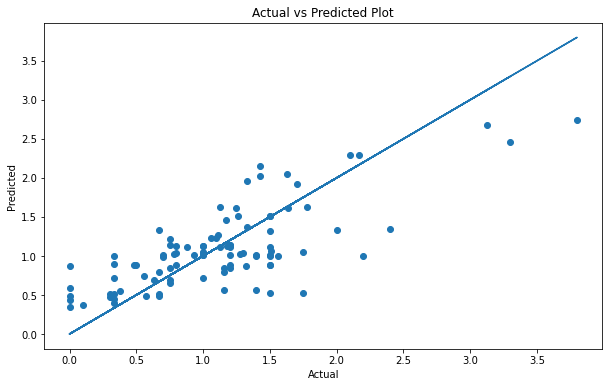

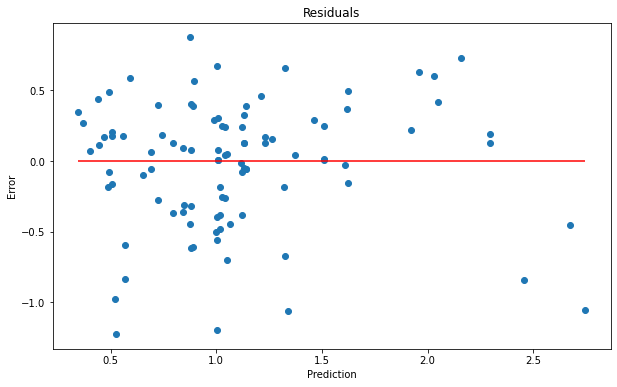

In [18]:
ada = AdaBoostRegressor(random_state=42)
ada = evaluateModel(ada, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.1905058201046612
R-squared (R2 ): 0.9228381308778192
MAE 0.1479699327235562

Testing SET
root mean squared error (RMSE): 0.4224250284069625
R-squared (R2 ): 0.5986306025850386
MAE 0.32328340616790807


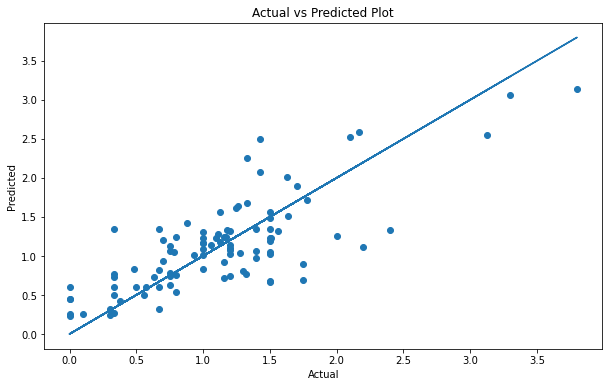

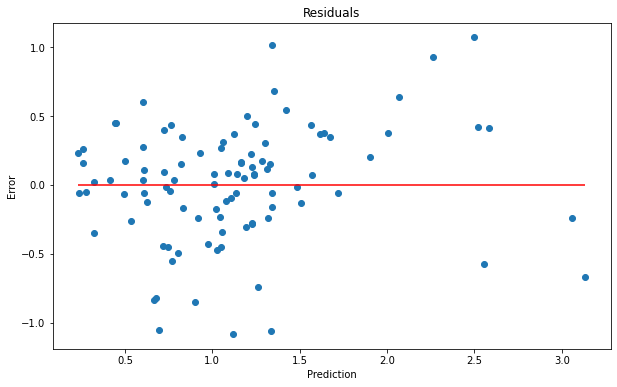

In [19]:
gb = GradientBoostingRegressor(random_state=42)
gb = evaluateModel(gb, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.001295643232697648
R-squared (R2 ): 0.9999964309132445
MAE 0.0008591243254343474

Testing SET
root mean squared error (RMSE): 0.495547559920083
R-squared (R2 ): 0.44764834889073746
MAE 0.3849468126555079


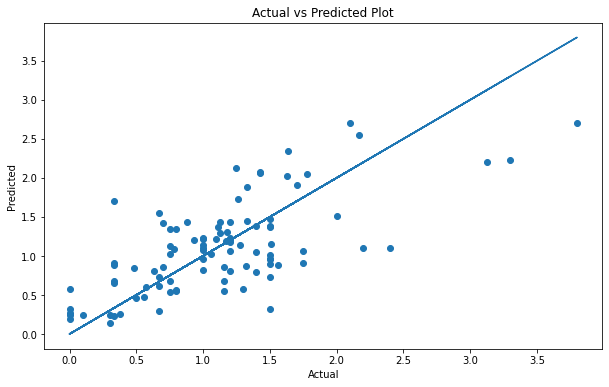

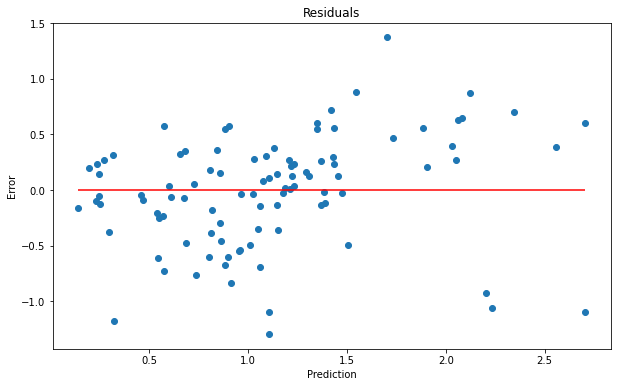

In [20]:
xgb = XGBRegressor(random_state=42)
xgb = evaluateModel(xgb, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.1915954458073072
R-squared (R2 ): 0.9219529295468729
MAE 0.14841241337404468

Testing SET
root mean squared error (RMSE): 0.4524207346943126
R-squared (R2 ): 0.5396056621049383
MAE 0.3465367998991519


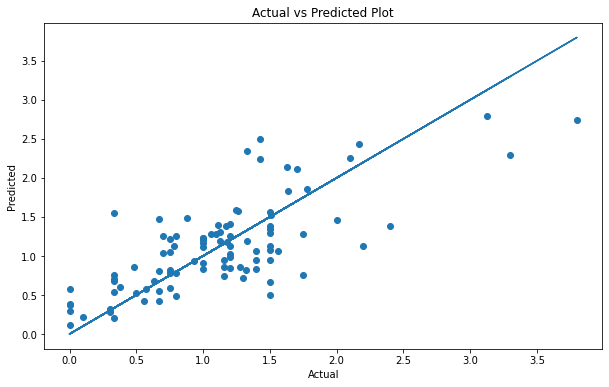

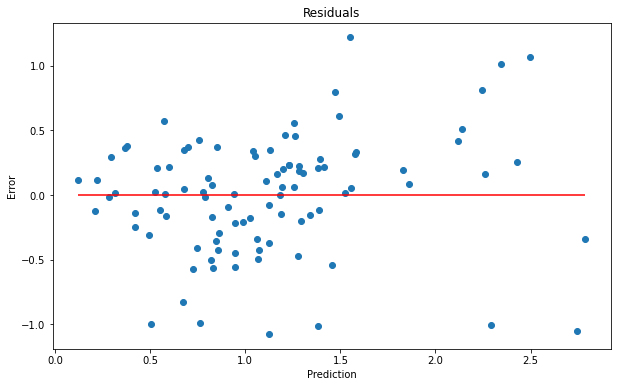

In [21]:
lgbm = LGBMRegressor(random_state=42)
lgbm = evaluateModel(lgbm, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.21869192114025232
R-squared (R2 ): 0.930258105464273
MAE 0.17232243624587487

Testing SET
root mean squared error (RMSE): 0.5290094363520558
R-squared (R2 ): 0.6520173583758563
MAE 0.39625908357499734


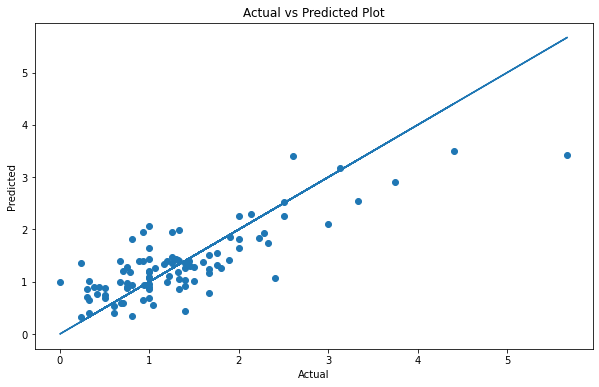

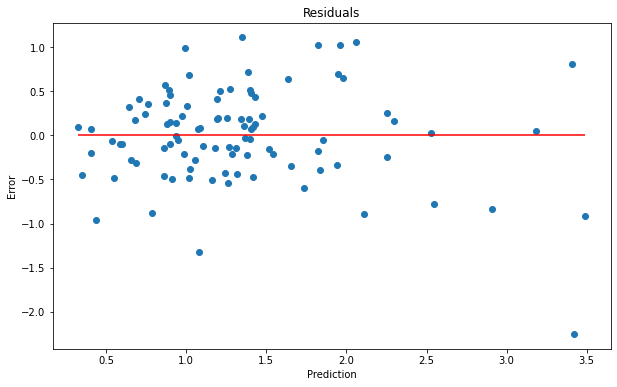

In [22]:
gb = GradientBoostingRegressor(random_state=42)
gb = evaluateModel(gb, xGA_X_train, xGA_y_train, xGA_X_test, xGA_y_test)

TRAINING SET
root mean squared error (RMSE): 0.4649110976572203
R-squared (R2 ): 0.6848131516699709
MAE 0.34798518398614425

Testing SET
root mean squared error (RMSE): 0.4684503497904311
R-squared (R2 ): 0.7271286887345083
MAE 0.3523619221929672


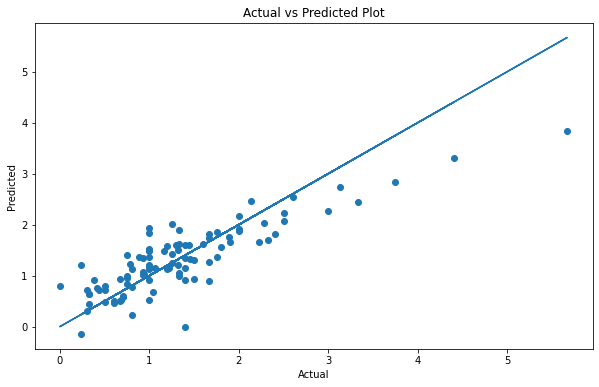

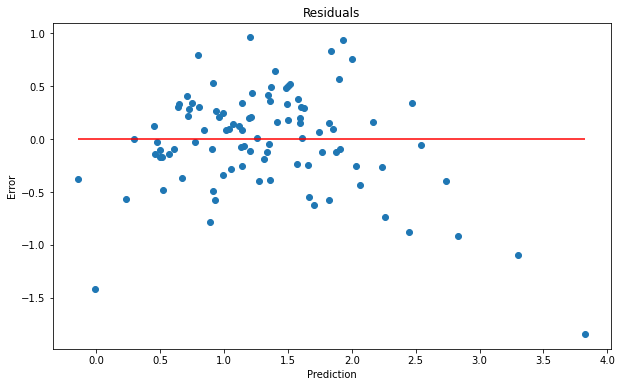

In [23]:
lr = LinearRegression()
lr = evaluateModel(lr, xGA_X_train, xGA_y_train, xGA_X_test, xGA_y_test)

In [24]:
xGS_Total.columns

Index(['Key', 'Year', 'Competition', 'Squad', 'Age', 'Poss', 'Gls', 'Sh',
       'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'PKatt', 'CrdY', 'CrdR', 'Fld', 'Int',
       'TklW', 'Confederation', 'O. CrdY', 'O. TklW', 'MP'],
      dtype='object')

In [25]:
xGA_Total.columns

Index(['Key', 'Year', 'Competition', 'Squad', 'O. Age', 'O. Poss', 'O. MP',
       'O. Gls', 'O. Sh', 'O. SoT', 'O. SoT%', 'O. G/Sh', 'O. G/SoT',
       'O. PKatt', 'O. CrdY', 'O. CrdR', 'O. Fld', 'O. Int', 'Confederation',
       'O. TklW', 'CrdY', 'TklW'],
      dtype='object')

In [26]:
# Second Model Attempt - Keeping similar metrics in to see if predictive abilities increase

 
xGS_Column_Drop_List2 = ['Key','Year','Competition','Squad','Age','MP','G/SoT','TklW','O. TklW','G/Sh']
xGA_Column_Drop_List2 = ['Key','Year','Competition','Squad','O. Age','O. MP','O. G/SoT','O. Fld', 'O. TklW', 'TklW','O. G/Sh']

xGS_Model_2 = xGS_Total.drop(xGS_Column_Drop_List2, axis=1)
xGA_Model_2 = xGA_Total.drop(xGA_Column_Drop_List2, axis=1)

In [27]:
xGS_Model_2

,Poss,Gls,Sh,SoT,SoT%,PKatt,CrdY,CrdR,Fld,Int,Confederation,O. CrdY
0,66.0,1.13,16.8,5.85,34.8,0.00,0.75,0.0,10.20,9.81,AFC,1.32
1,51.7,0.67,10.7,2.33,21.9,0.67,2.33,0.0,11.00,8.00,AFC,1.67
2,46.3,0.70,15.6,4.19,26.9,0.23,0.47,0.0,12.60,10.00,AFC,1.40
3,50.6,1.20,9.6,3.20,33.3,0.20,1.00,0.0,11.80,10.40,AFC,1.40
4,36.7,1.33,9.0,3.00,33.3,0.33,0.67,0.0,11.00,13.00,AFC,1.33
...,...,...,...,...,...,...,...,...,...,...,...,...
381,52.4,1.42,10.0,3.81,38.1,0.27,0.44,0.0,8.05,7.26,UEFA,2.30
382,24.9,0.10,3.8,0.90,23.7,0.00,2.40,0.1,10.70,11.40,UEFA,0.90
383,22.0,0.10,2.4,1.10,45.8,0.00,1.80,0.0,10.10,8.20,UEFA,0.80
384,49.7,1.30,11.1,3.70,33.3,0.20,2.10,0.1,13.70,9.40,UEFA,2.20


In [28]:
xGA_corrs

O. Gls      1.000000
O. SoT      0.819783
O. G/Sh     0.775568
O. Sh       0.679150
O. G/SoT    0.575009
O. SoT%     0.542885
O. Poss     0.538468
CrdY        0.406690
O. PKatt    0.330771
O. CrdY     0.278928
O. Int      0.178376
O. CrdR     0.132090
Year        0.099312
TklW        0.084096
O. Fld      0.073035
O. MP       0.052627
O. Age      0.045203
O. TklW     0.016299
Name: O. Gls, dtype: float64

In [29]:
xGA_Model_2

,O. Poss,O. Gls,O. Sh,O. SoT,O. SoT%,O. PKatt,O. CrdY,O. CrdR,O. Int,Confederation,CrdY
0,34.0,0.75,7.74,3.02,39.0,0.19,1.32,0.0,9.43,AFC,0.75
1,48.3,1.33,8.33,3.67,44.0,0.33,1.67,0.0,7.67,AFC,2.33
2,53.8,0.93,9.53,1.63,17.1,0.23,1.40,0.0,11.20,AFC,0.47
3,49.4,1.40,12.00,4.20,35.0,0.20,1.40,0.0,8.80,AFC,1.00
4,63.3,1.33,15.00,3.67,24.4,0.33,1.33,0.0,11.30,AFC,0.67
...,...,...,...,...,...,...,...,...,...,...,...
381,47.6,1.06,11.20,4.42,39.4,0.27,2.30,0.0,10.30,UEFA,0.44
382,75.1,4.40,23.50,10.10,43.0,0.50,0.90,0.0,7.10,UEFA,2.40
383,78.0,4.80,30.80,12.60,40.9,0.60,0.80,0.0,5.80,UEFA,1.80
384,50.3,1.20,10.40,3.70,35.6,0.10,2.20,0.0,9.50,UEFA,2.10


In [30]:
# Scaling Remaining Features - removing Gls and Confederation when scaling, and adding back in

xGS_Model_2_features = xGS_Model_2.drop(['Confederation','Gls'], axis=1)
xGA_Model_2_features = xGA_Model_2.drop(['Confederation','O. Gls'], axis=1)

xGS_scaler2 = StandardScaler().fit(xGS_Model_2_features)
xGA_scaler2 = StandardScaler().fit(xGA_Model_2_features)


xGS_scaler_df2 = pd.DataFrame(xGS_scaler2.transform(xGS_Model_2_features), columns = xGS_Model_2_features.columns)
xGA_scaler_df2 = pd.DataFrame(xGA_scaler2.transform(xGA_Model_2_features), columns = xGA_Model_2_features.columns)

xGS_scaler_df2['Gls'] = xGS_Model_2['Gls']
xGA_scaler_df2['O. Gls'] = xGA_Model_2['O. Gls']
xGS_scaler_df2['Confederation'] = xGS_Model_2['Confederation']
xGA_scaler_df2['Confederation'] = xGA_Model_2['Confederation']

In [31]:
# Create final model variable and one-hot encode Confederation

xGS_Model_2_Final = pd.get_dummies(xGS_scaler_df2, columns=['Confederation'])
xGA_Model_2_Final = pd.get_dummies(xGA_scaler_df2, columns=['Confederation'])

In [32]:
# Get features and target for both models

xGS_X2 = xGS_Model_2_Final.drop('Gls', axis=1).values
xGS_y2 = xGS_Model_2_Final['Gls'].values

xGA_X2 = xGA_Model_2_Final.drop('O. Gls', axis=1).values
xGA_y2 = xGA_Model_2_Final['O. Gls']

In [33]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGS_X_train2, xGS_X_test2, xGS_y_train2, xGS_y_test2 = train_test_split(xGS_X2, xGS_y2, random_state=42, test_size=.1)

# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGA_X_train2, xGA_X_test2, xGA_y_train2, xGA_y_test2 = train_test_split(xGA_X2, xGA_y2, random_state=42, test_size=.1)

TRAINING SET
root mean squared error (RMSE): 0.3765479193542895
R-squared (R2 ): 0.6896460524330877
MAE 0.2924707631682577

Testing SET
root mean squared error (RMSE): 0.4310096400178087
R-squared (R2 ): 0.6455926977640001
MAE 0.3488977582583962


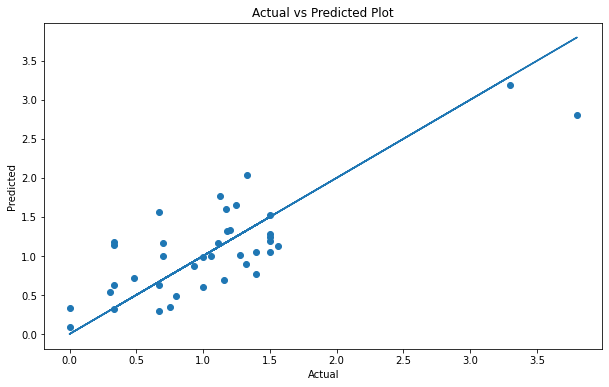

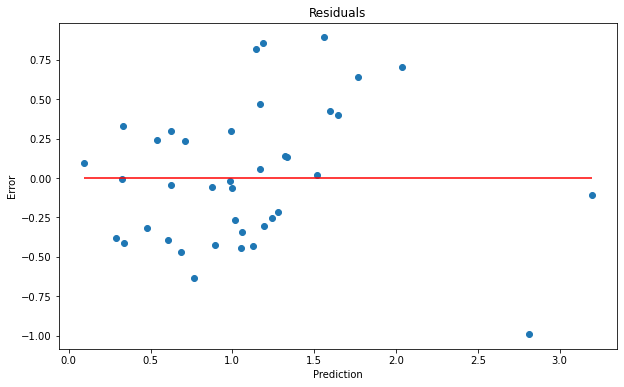

In [34]:
lr = LinearRegression()
lr = evaluateModel(lr, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.6613847295276867
R-squared (R2 ): 0.0425301743344807
MAE 0.5109135134352227

Testing SET
root mean squared error (RMSE): 0.7120000303129999
R-squared (R2 ): 0.03286139713964542
MAE 0.4768016499490652


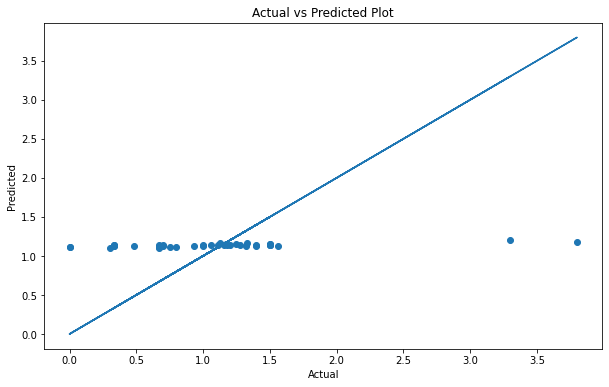

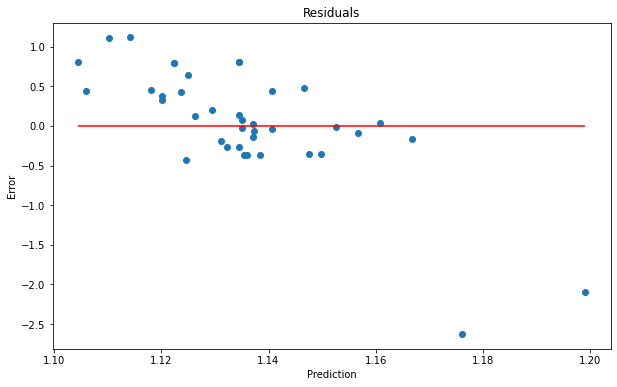

In [47]:
en = ElasticNet()
en = evaluateModel(en,xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.19129040759956548
R-squared (R2 ): 0.9199054151874878
MAE 0.14599948521995784

Testing SET
root mean squared error (RMSE): 0.4253470690898555
R-squared (R2 ): 0.6548438761110285
MAE 0.350681963538863


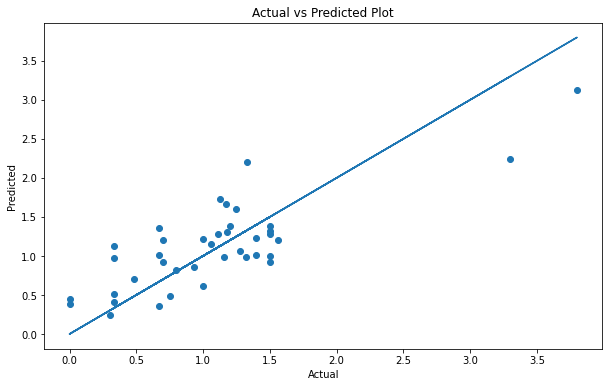

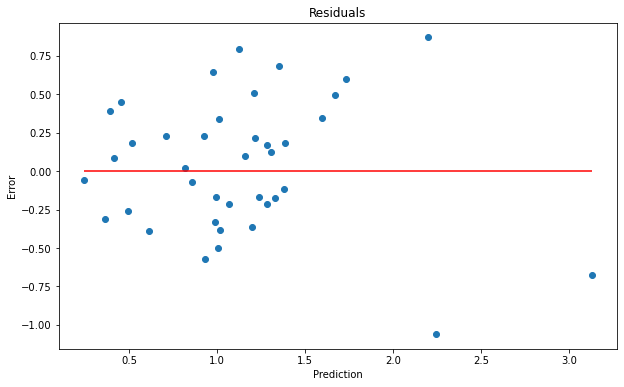

In [35]:
gb = GradientBoostingRegressor(random_state=42)
gb = evaluateModel(gb, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.15153461487342199
R-squared (R2 ): 0.9497379186826264
MAE 0.1144263259323646

Testing SET
root mean squared error (RMSE): 0.47891467410805216
R-squared (R2 ): 0.5624325758056281
MAE 0.37334547808858015


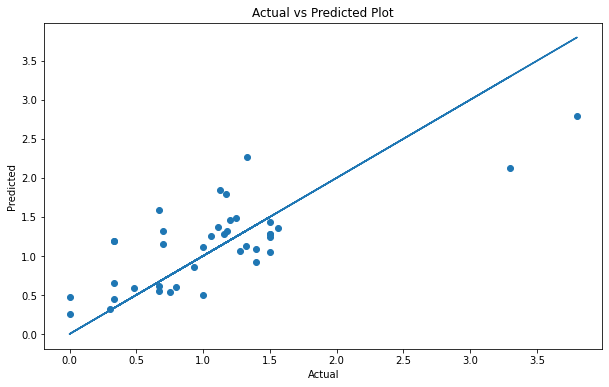

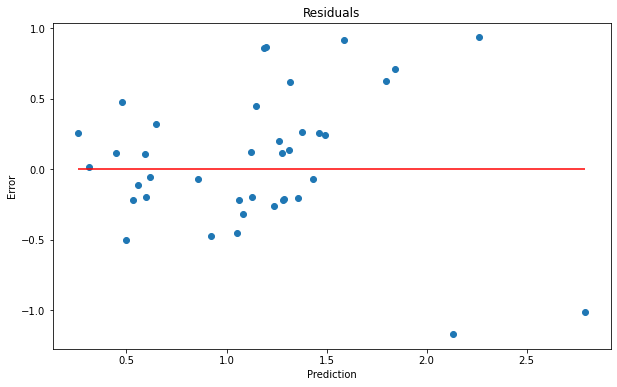

In [36]:
lgbm = LGBMRegressor(random_state=42)
lgbm = evaluateModel(lgbm, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.0010363524029436328
R-squared (R2 ): 0.999997649113366
MAE 0.0007117904364025649

Testing SET
root mean squared error (RMSE): 0.4751696027253466
R-squared (R2 ): 0.5692492970185635
MAE 0.37203328036344974


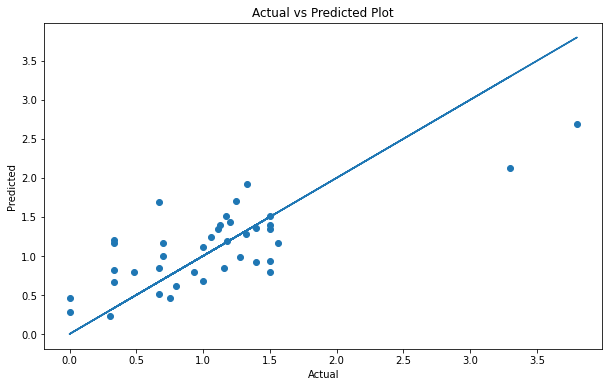

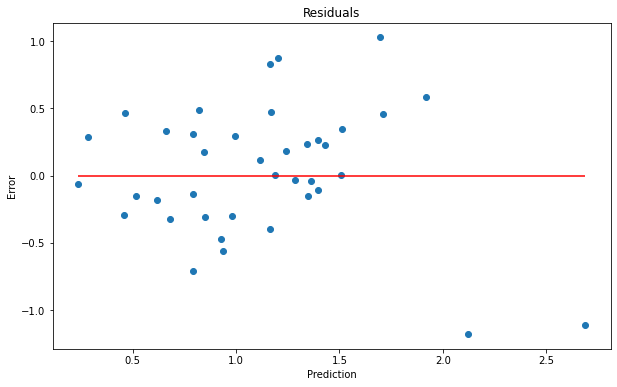

In [37]:
xgb = XGBRegressor(random_state=42)
xgb = evaluateModel(xgb, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.37712253850498934
R-squared (R2 ): 0.688698117872262
MAE 0.2916017156501245

Testing SET
root mean squared error (RMSE): 0.43039917313084314
R-squared (R2 ): 0.6465959268540211
MAE 0.3479603477561488


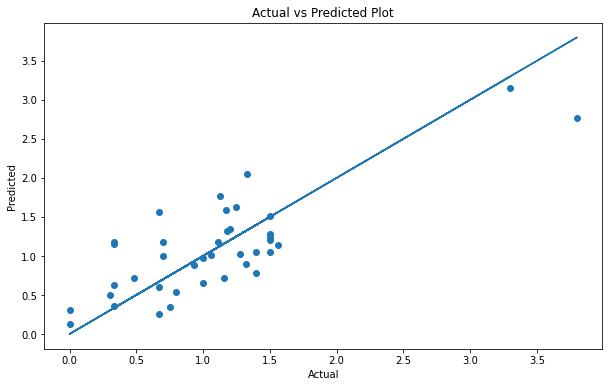

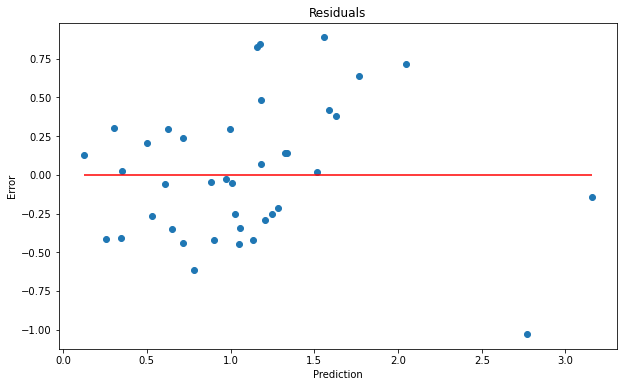

In [38]:
ridge = Ridge()
ridge = evaluateModel(ridge, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.4442216025638362
R-squared (R2 ): 0.7142070365366009
MAE 0.32916854099223875

Testing SET
root mean squared error (RMSE): 0.45374319749548336
R-squared (R2 ): 0.7801263216138101
MAE 0.35080530817248956


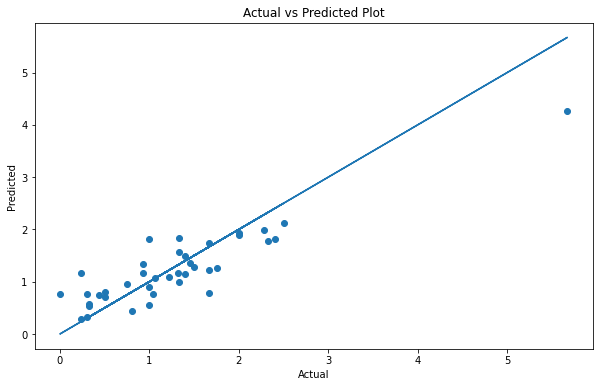

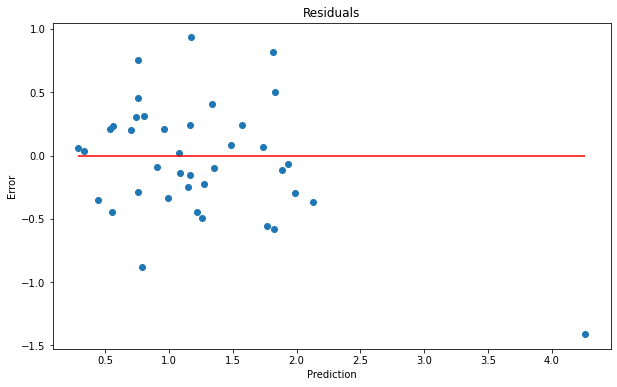

In [39]:
ridge = Ridge()
ridge = evaluateModel(ridge, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.3250039751662355
R-squared (R2 ): 0.7687966538614771
MAE 0.2660901188296393

Testing SET
root mean squared error (RMSE): 0.44459944179358485
R-squared (R2 ): 0.6228913274307192
MAE 0.36786770806675423


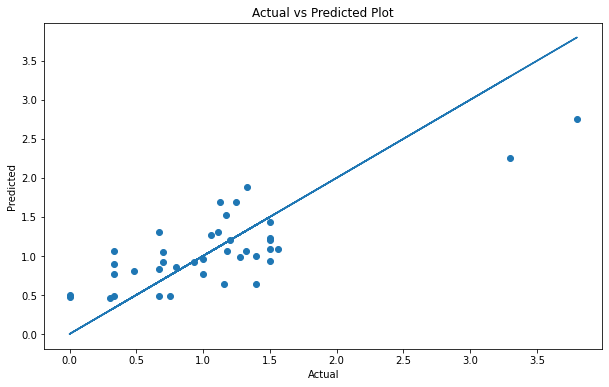

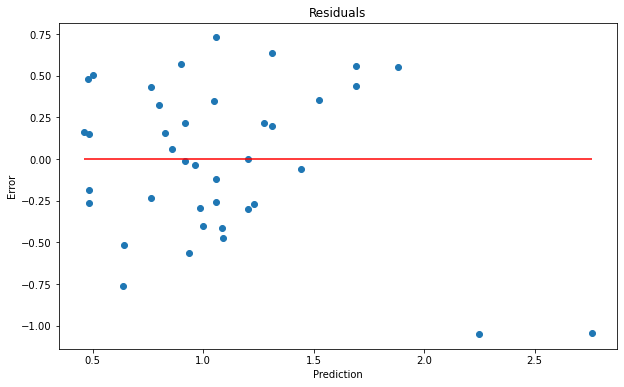

In [40]:
ada = AdaBoostRegressor(random_state=42)
ada = evaluateModel(ada, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.1547020411222086
R-squared (R2 ): 0.9476147697751065
MAE 0.1135662824207493

Testing SET
root mean squared error (RMSE): 0.4504789752912862
R-squared (R2 ): 0.6128513520415522
MAE 0.3625384615384616


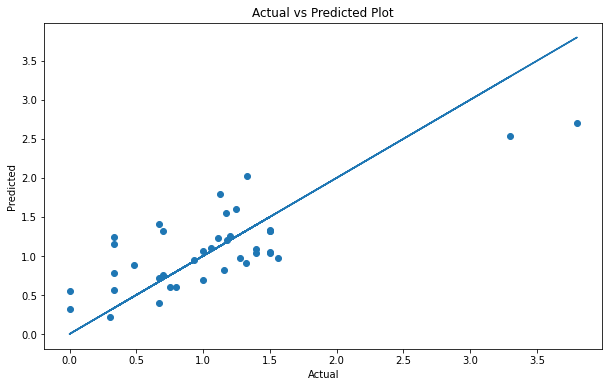

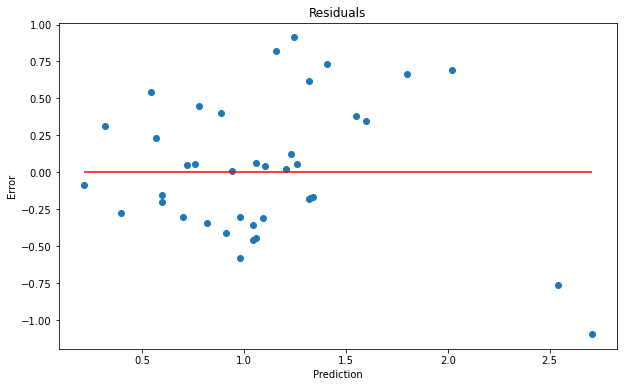

In [41]:
rf = RandomForestRegressor()
rf = evaluateModel(rf, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.44317590245429117
R-squared (R2 ): 0.7155509692936193
MAE 0.32899905904065313

Testing SET
root mean squared error (RMSE): 0.4474270855812802
R-squared (R2 ): 0.7862050070011903
MAE 0.3553522454371048


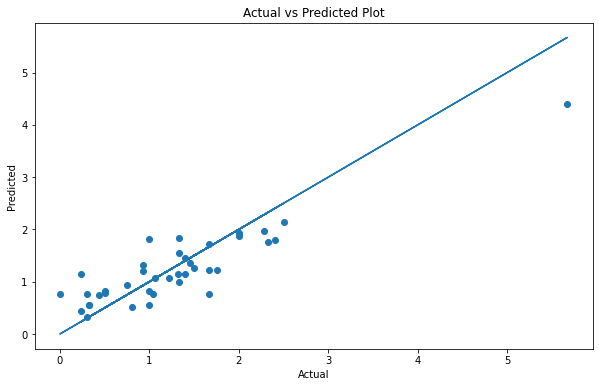

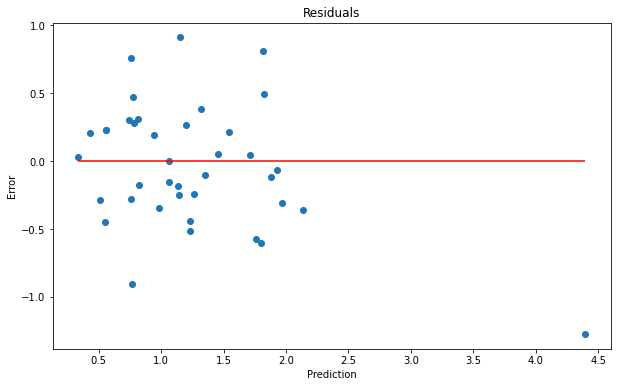

In [42]:
# xGA Model 2 Exploration
lr = LinearRegression()
lr = evaluateModel(lr, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.21434913215036136
R-squared (R2 ): 0.933458031911152
MAE 0.1537662660932299

Testing SET
root mean squared error (RMSE): 0.6734391379859932
R-squared (R2 ): 0.5156607190385186
MAE 0.4721604422681551


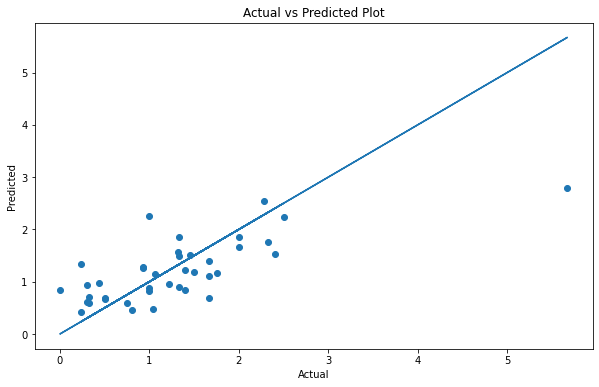

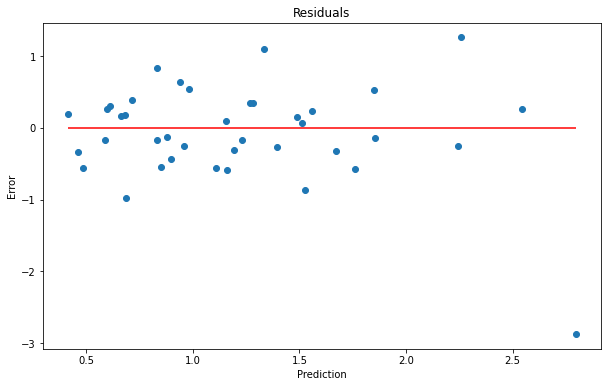

In [43]:
lgbm = LGBMRegressor(random_state=42)
lgbm = evaluateModel(lgbm, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

In [44]:
ridge = Ridge()
#ridge = evaluateModel(ridge, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

In [45]:
# Final Ridge Models
lasso_xGS =  ridge.fit(xGS_X2,xGS_y2)
lasso_xGA = ridge.fit(xGA_X2, xGA_y2)

In [46]:
# xGS and xGA Preds using ridge regeression on second model

xGS_Preds = lasso_xGS.predict()
xGA_Preds = lasso_xGA.predict(xGA_y2)

TypeError: predict() missing 1 required positional argument: 'X'